# SVHN Classification Using Convolutional Neural Network on 2000 samples

CNN Notebook
Project : Street View House Numbers
By: Peiyao (Celine) Li 

# Preprocessing

The following preprocessing techniques were used: Reshaping the dataset, converting RGB to grayscale, scaling the data, and undersampling the training data to select 2000 data from the whole dataset and have an even distribution among classes

In [247]:
# import all libraries
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd
import io
from PIL import Image
from sklearn import datasets
from sklearn.metrics import accuracy_score
from scipy.io import loadmat
from sklearn import preprocessing
import h5py
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow import keras
from sklearn.metrics import confusion_matrix

import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)


In [199]:
# path of the dataset from desktop
tr_set = "C:/Users/Celin/Desktop/CelineFirstJupyter/Street_num Final Project/Format 2/train_32x32.mat"
te_set = "C:/Users/Celin/Desktop/CelineFirstJupyter/Street_num Final Project/Format 2/test_32x32.mat"

In [200]:
#dataset load-in
data = loadmat(tr_set)
te_data = loadmat(te_set)

X_tr, y_tr = data['X'], data['y']
X_te, y_te = te_data['X'], te_data['y']

In [201]:
# explore training data details
print ("Training Set Shape Params: <width, height, channels [rgb], # of images>")
print("X Shape: ", X_tr.shape, " y Shape: ", y_tr.shape)

Training Set Shape Params: <width, height, channels [rgb], # of images>
X Shape:  (32, 32, 3, 73257)  y Shape:  (73257, 1)


In [202]:
#explore numbers of pixels in total in each set
X_tr.size, X_te.size

(225045504, 79970304)

In [203]:
# transpose data to (# of images, width, height, rgb)
X_tr, y_tr = X_tr.transpose((3,0,1,2)), y_tr[:,0]
X_te, y_te = X_te.transpose((3,0,1,2)), y_te[:,0]
print("X Shape: ", X_tr.shape, " y Shape: ", y_tr.shape)

X Shape:  (73257, 32, 32, 3)  y Shape:  (73257,)


In [204]:
#count the number of original data per label n test and training data
import collections
print(collections.Counter(y_te))
print(collections.Counter(y_tr))

Counter({1: 5099, 2: 4149, 3: 2882, 4: 2523, 5: 2384, 7: 2019, 6: 1977, 10: 1744, 8: 1660, 9: 1595})
Counter({1: 13861, 2: 10585, 3: 8497, 4: 7458, 5: 6882, 6: 5727, 7: 5595, 8: 5045, 10: 4948, 9: 4659})


In [205]:
#take 2000 training data and 400 test data
X_tr_new=[]
y_tr_new=[]
X_te_new=[]
y_te_new=[]
# y_train_new=list(y_train)
# X_train_new=list(X_train)

for i in range(1,11):
    for a,b in zip(X_tr,y_tr):
        if b == i and y_tr_new.count(i)<200:
            X_tr_new.append(a)
            y_tr_new.append(b)
        else:
            continue
            
for i in range(1,11):
    for a,b in zip(X_te,y_te):
        if b == i and y_te_new.count(i)<80:
            X_te_new.append(a)
            y_te_new.append(b)
        else:
            continue

In [206]:
#double check the count of each label in the new data
for i in range(1,11):
    print(y_tr_new.count(i))
    print(y_te_new.count(i))

200
80
200
80
200
80
200
80
200
80
200
80
200
80
200
80
200
80
200
80


In [207]:
X_tr=np.array(X_tr_new)
y_tr= np.array(y_tr_new)
X_te=np.array(X_te_new)
y_te= np.array(y_te_new)
print("X Shape: ", X_tr.shape, " y Shape: ", y_tr.shape)

X Shape:  (2000, 32, 32, 3)  y Shape:  (2000,)


In [208]:
# explore all the labels , note that 0 was originally labled as 10
np.set_printoptions(threshold=np.inf)
# print(y_tr)

In [209]:
# change all label "10" to 0 as shown in images
for i in range(len(y_tr)):
    if (y_tr[i]==10):
        y_tr[i]=0
for i in range(len(y_te)):
    if (y_te[i]==10):
        y_te[i]=0  
#check to see the new labels
print(y_tr)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 

In [210]:
# convert RGB to grayscale
def rgb2gray(img_data):
    return np.expand_dims(np.dot(img_data, [0.3, 0.6, 0.1]), axis=3)

X_tr_gr = rgb2gray(X_tr).astype(np.float32) # converts gray training set to float values
print("Training Set", X_tr_gr.shape)
X_tr = X_tr_gr # replace original training set

X_te_gr = rgb2gray(X_te).astype(np.float32) # converts gray testing set to float values
print("Testing Set", X_te_gr.shape)
X_te = X_te_gr # replace original testing set

Training Set (2000, 32, 32, 1)
Testing Set (800, 32, 32, 1)


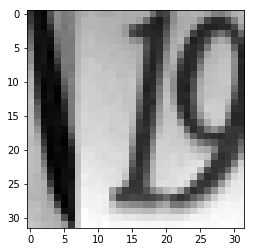

In [211]:
# show an example image using gray scale
digit_img = X_tr[0].reshape((32,32))
plt.imshow(digit_img, cmap='gray')
plt.show()

In [212]:
# create train and test set
train_images = X_tr
test_images = X_te
train_labels = y_tr
test_labels = y_te

In [213]:
# print max values to scale the values 
print(np.max(train_images))
print(np.max(test_images))

255.0
255.0


In [214]:
# normalize the feature values to be between 0 to 1 using min/max scaling method
train_images, test_images = train_images / 255.0, test_images / 255.0

## Implement Convolutional Neural Network Model

In [249]:
#Through trial it is found 3 CNN layers with depths 64,128 and 128 performed the best
# the first two convolutional layers are followed by a MaxPooling where the size of the output is reduced
# 3 by 3 is standard filter size in CNN, and 32/64/128 are the standard output channel depths, by convention the latter layers have more depth
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), input_shape=(32,32,1)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3)))
model.add(layers.LeakyReLU(alpha=0.1))
model.add(layers.MaxPooling2D((2, 2)))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 64)        640       
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 13, 13, 128)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 128)         147584    
__________

In [250]:
# define dense layer array
model.add(layers.Flatten())
neuron=64
dropout_rate=0.4
model.add(layers.Dense(neuron, activation='relu'))#through trials it is found that relu activiation peforms best
model.add(layers.Dropout(dropout_rate))#through trialit is found that dropout=0.4 peforms best
model.add(layers.Dense(10, activation='softmax'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 64)        640       
_________________________________________________________________
leaky_re_lu_15 (LeakyReLU)   (None, 30, 30, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 128)       73856     
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 13, 13, 128)       0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 128)         147584    
__________

In [217]:
# compile model and train the dataset
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(train_images, train_labels, epochs=10)#through trial it is found epoch of 10 performed best


Epoch 1/10
2000/2000 [==============================] - 6s 3ms/sample - loss: 2.3062 - acc: 0.1010
Epoch 2/10
2000/2000 [==============================] - 5s 2ms/sample - loss: 2.2924 - acc: 0.1215
Epoch 3/10
2000/2000 [==============================] - 5s 2ms/sample - loss: 2.0768 - acc: 0.2565
Epoch 4/10
2000/2000 [==============================] - 5s 2ms/sample - loss: 1.4967 - acc: 0.5065
Epoch 5/10
2000/2000 [==============================] - 5s 2ms/sample - loss: 1.1431 - acc: 0.6175
Epoch 6/10
2000/2000 [==============================] - 5s 2ms/sample - loss: 0.9133 - acc: 0.7060
Epoch 7/10
2000/2000 [==============================] - 5s 2ms/sample - loss: 0.7896 - acc: 0.7395
Epoch 8/10
2000/2000 [==============================] - 5s 2ms/sample - loss: 0.6720 - acc: 0.7835
Epoch 9/10
2000/2000 [==============================] - 5s 2ms/sample - loss: 0.5851 - acc: 0.8140
Epoch 10/10
2000/2000 [==============================] - 5s 2ms/sample - loss: 0.5322 - acc: 0.8345


In [254]:
# Gridsearch commented out
#from keras.wrappers.scikit_learn import KerasClassifier
# from sklearn.model_selection import GridSearchCV
# def create_model():
#     model = models.Sequential()
#     model.add(layers.Conv2D(64, (3, 3), input_shape=(32,32,1)))
#     model.add(layers.LeakyReLU(alpha=0.1))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(128, (3, 3)))
#     model.add(layers.LeakyReLU(alpha=0.1))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Conv2D(128, (3, 3)))
#     model.add(layers.LeakyReLU(alpha=0.1))
#     model.add(layers.MaxPooling2D((2, 2)))
#     model.add(layers.Flatten())
#     neuron=64
#     model.add(layers.Dense(neuron, activation='relu'))#through trials it is found that relu activiation peforms best
#     model.add(layers.Dropout(dropout_rate))#through trialit is found that dropout=0.4 peforms best
#     model.add(layers.Dense(10, activation='softmax'))
#     model.compile(optimizer='adam',
#                   loss='sparse_categorical_crossentropy',
#                   metrics=['accuracy'])

#     model.fit(train_images, train_labels, epochs=10)

#     return model
# model = KerasClassifier(build_fn=create_model, verbose=0)

# epochs = [5, 10]
# dropout=[0,0.2,0.3,0.4,0.5]
# dense=[64,128]
# param_grid = dict(epochs=epochs, dropout_rate=dropout,neuron=dense )
# grid = GridSearchCV(estimator=model,scoring= 'accuracy', param_grid=param_grid, n_jobs=-1, cv=3)
# grid_result = grid.fit(train_images, train_labels)
# print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Model Evaluation

Testing accuracy and confusion matrix were utilized to evaluate model performance

In [218]:
# testing
test_loss, test_acc = model.evaluate(test_images, test_labels)
test_pred=model.predict(test_images)

800/800 [==============================] - 1s 1ms/sample - loss: 0.7832 - acc: 0.7487


In [219]:
# testing accuracy output
print(test_acc)

0.74875


The CNN model achieved 75% test accuracy with 2000 training samples, which is a significant increase from 50% accuracy with 2000 samples using Random Forest

In [220]:
#Check the softmax distribution for each category for the first 10 images and print their labels
output = model.predict(test_images[:10])
print(output)
print(np.argmax(output, axis=1))

[[1.8366296e-03 2.8051609e-01 8.8343928e-03 1.9849962e-04 7.0741260e-01
  6.2595439e-07 3.6653889e-06 5.8113883e-04 5.5731711e-04 5.9232250e-05]
 [6.9770934e-03 9.7000849e-01 6.4357452e-04 1.4045831e-03 2.5367488e-03
  2.2241384e-05 7.4365751e-05 1.6849244e-02 1.4401611e-03 4.3469670e-05]
 [1.6785804e-03 9.9804109e-01 1.4843173e-05 1.1962554e-04 6.5338121e-05
  3.3512428e-08 1.2477773e-06 3.1348049e-05 4.5754434e-05 2.2217448e-06]
 [4.3499595e-03 9.7061229e-01 7.2558774e-03 2.2005052e-03 1.0994440e-02
  4.5391007e-05 1.8172756e-04 3.0232116e-03 1.1570944e-03 1.7953845e-04]
 [2.6458369e-03 9.1556531e-01 1.7838808e-02 4.5355590e-04 6.2628433e-02
  6.1764858e-06 1.4201440e-05 4.6269447e-04 1.8130007e-04 2.0361325e-04]
 [1.3808462e-04 9.9959284e-01 2.2437982e-06 7.0011796e-05 6.8758483e-05
  8.2710166e-08 5.7781136e-07 1.0177033e-04 2.5390686e-05 1.4502304e-07]
 [1.8596747e-03 9.9455160e-01 6.3245643e-05 3.7172483e-04 2.5944007e-03
  2.1075525e-06 1.7783535e-05 1.9754531e-04 3.2390922e-04 

(32, 32) 1


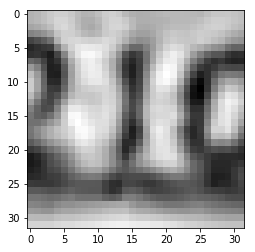

(32, 32) 1


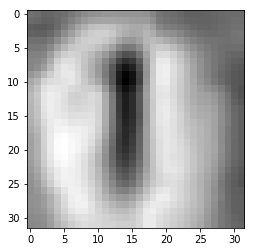

(32, 32) 1


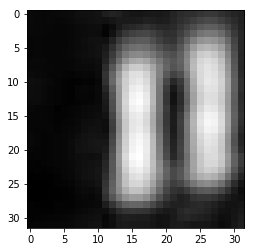

(32, 32) 1


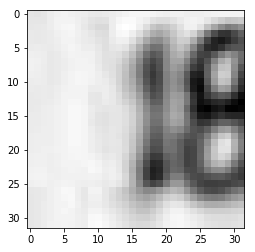

(32, 32) 1


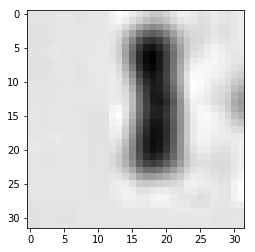

(32, 32) 1


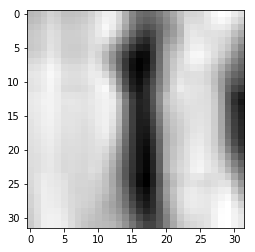

(32, 32) 1


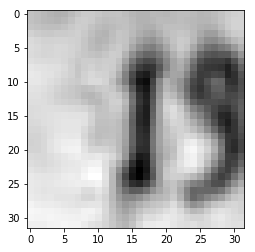

(32, 32) 1


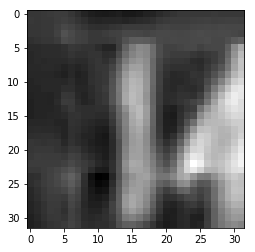

(32, 32) 1


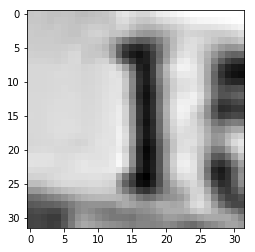

(32, 32) 1


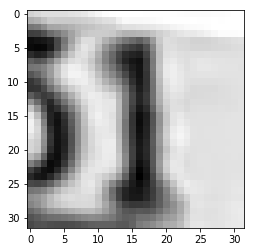

In [221]:
# view 10 test images to make sure they actually match their labels printed above, and they do! yay!
X_orig_tr = data['X']
X_orig_te = te_data['X']

for i in range(0,10):
    show_img = X_te[i].reshape((32,32))
    print(show_img.shape,y_te[i])
    plt.imshow(show_img,cmap='gray')
    plt.show()


In [222]:
#confusion matrix to see what the frequent mistakes are
test_pred = np.argmax(test_pred, axis=1)
confusion_matrix(test_labels,test_pred)

array([[62,  4,  5,  1,  0,  0,  4,  1,  0,  3],
       [ 0, 68,  2,  1,  3,  1,  1,  4,  0,  0],
       [ 1,  1, 63,  6,  1,  1,  0,  4,  1,  2],
       [ 2,  3,  1, 40,  1, 20,  1,  1,  2,  9],
       [ 0,  1,  1,  1, 70,  2,  1,  1,  2,  1],
       [ 2,  0,  0,  3,  1, 65,  7,  0,  0,  2],
       [ 5,  2,  0,  2,  1,  6, 60,  0,  2,  2],
       [ 1,  5,  1,  0,  0,  0,  0, 73,  0,  0],
       [ 2,  2,  1,  6,  0, 10, 17,  1, 37,  4],
       [ 8,  0,  3,  3,  0,  0,  3,  2,  0, 61]], dtype=int64)

Total 800 test samples used
The model performed OK overall, but has some misclassifications.
Lots of 5 and 6 misclassified as 8
Lots of 5 and 9 misclassified as 3
0 misclassified as 9
This model performed better than RF but 75% accuracy is not good enough. See next notebook for the final proposed CNN model.

# CNN Model Visualization 

Although it is not in the scope of the project,I added visualization of CNN filters and filtered images of two test images in case you are curious what the CNN model is doing.Note that the visualization code below are not all produced by myself, I refered to these sources: https://towardsdatascience.com/visualizing-intermediate-activation-in-convolutional-neural-networks-with-keras-260b36d60d0; https://machinelearningmastery.com/how-to-visualize-filters-and-feature-maps-in-convolutional-neural-networks/; https://www.analyticsvidhya.com/blog/2018/03/essentials-of-deep-learning-visualizing-convolutional-neural-networks/

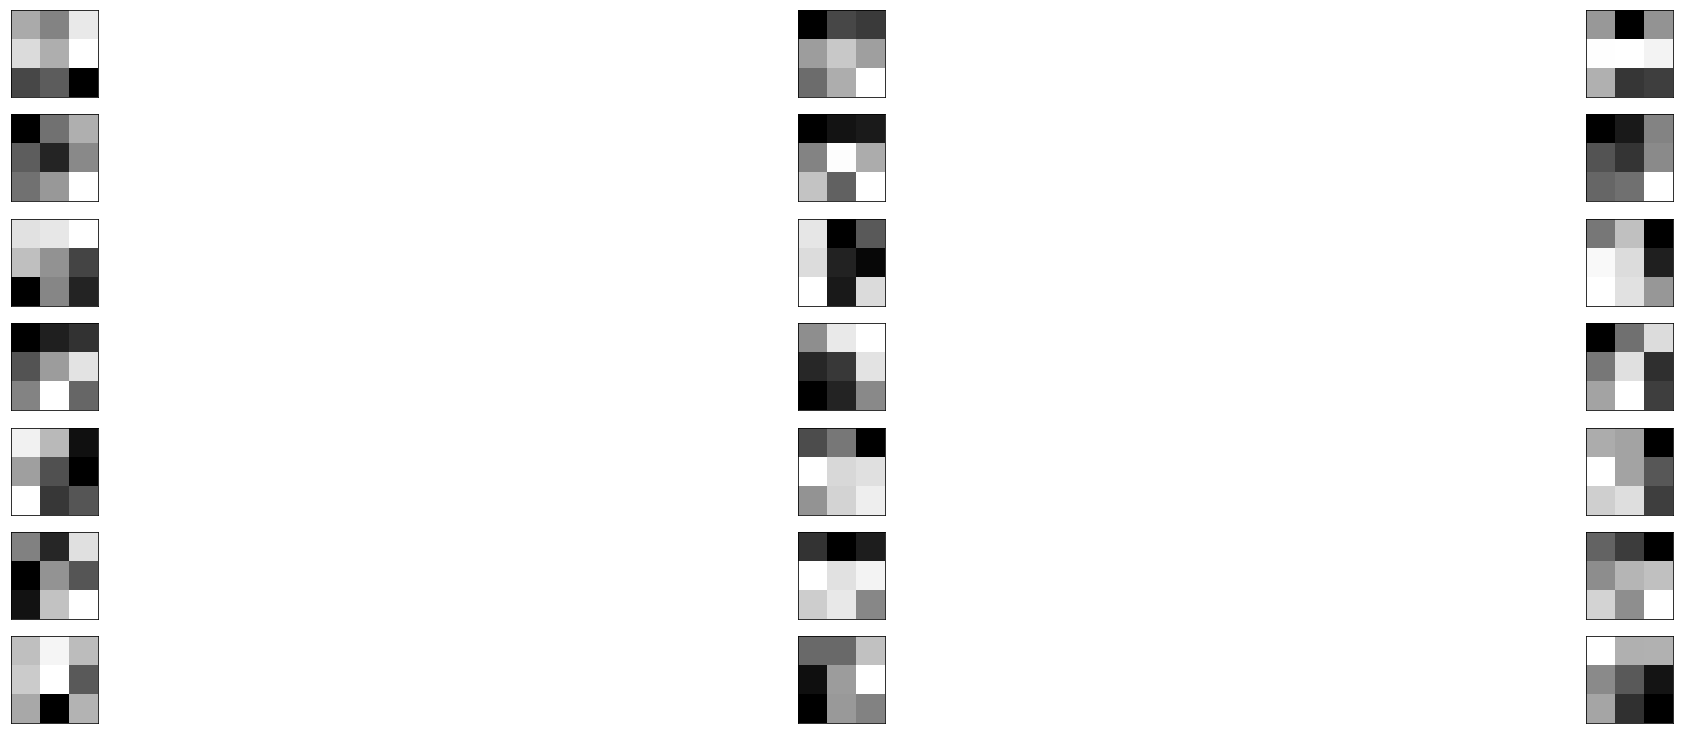

In [223]:
# top_layer = model.layers[0]
# plt.imshow(top_layer.get_weights()[0][:, :, :, 0].squeeze(), cmap='gray')
filters, biases = model.layers[0].get_weights()
n_filters, ix = 21, 1
plt.figure(figsize=(40,40))
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

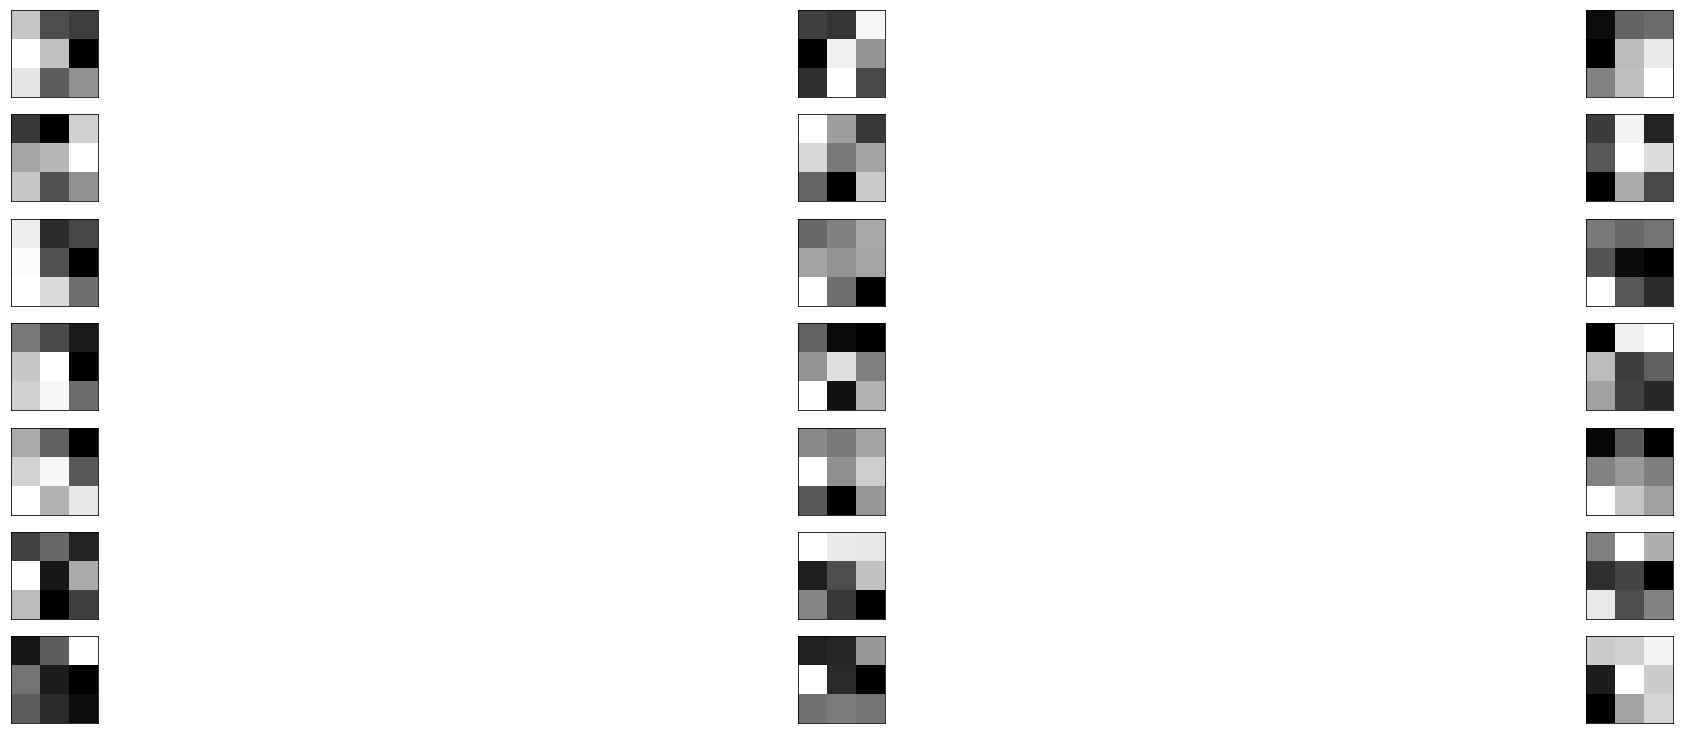

In [224]:
filters, biases = model.layers[3].get_weights()
plt.figure(figsize=(40,40))
n_filters, ix = 21, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

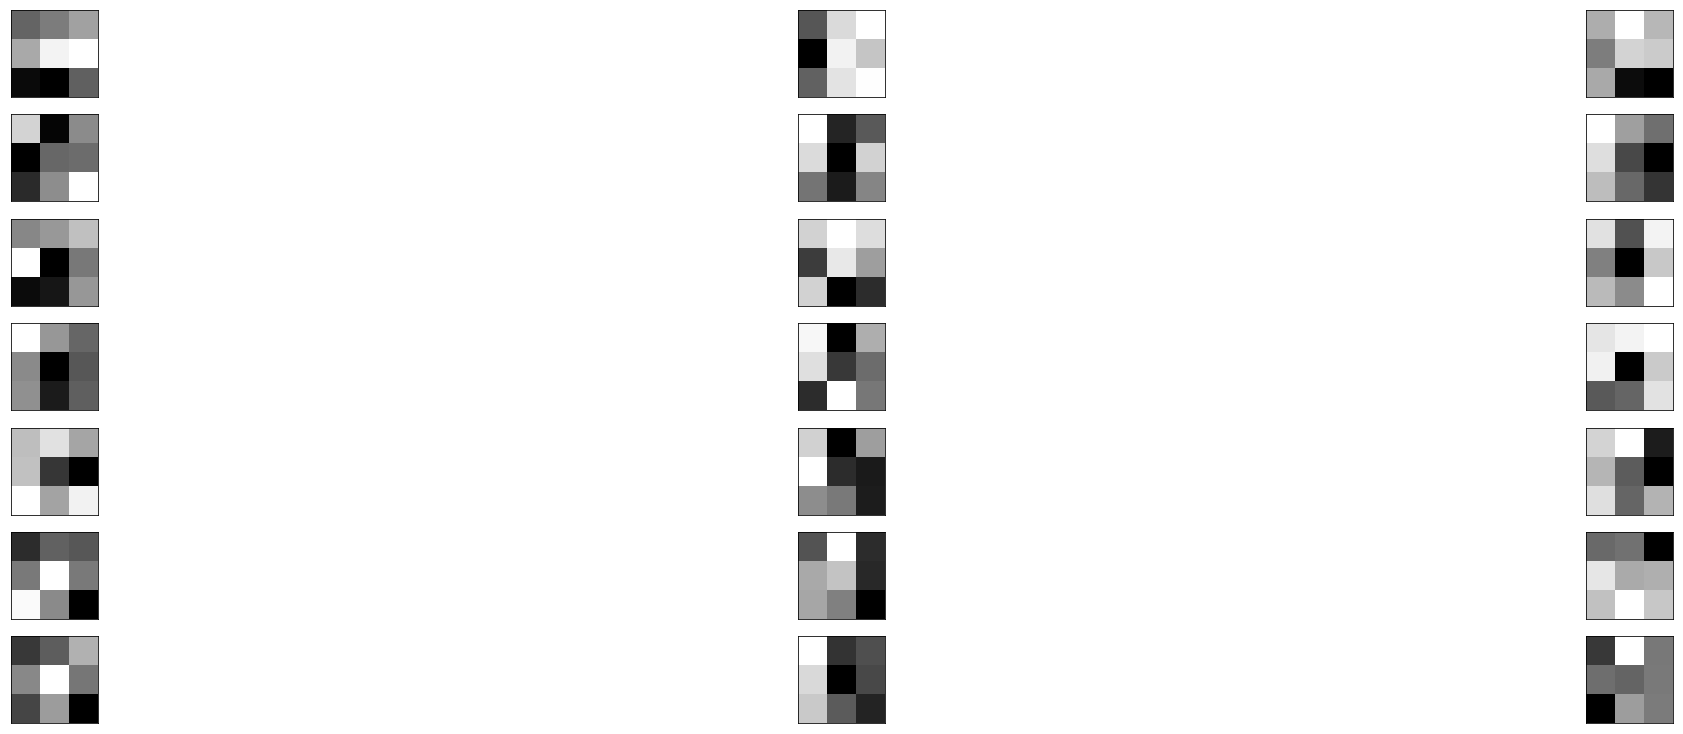

In [225]:
filters, biases = model.layers[6].get_weights()
plt.figure(figsize=(40,40))
n_filters, ix = 21, 1
for i in range(n_filters):
	# get the filter
	f = filters[:, :, :, i]
	# plot each channel separately
	for j in range(1):
		# specify subplot and turn of axis
		ax = plt.subplot(n_filters, 3, ix)
		ax.set_xticks([])
		ax.set_yticks([])
		# plot filter channel in grayscale
		plt.imshow(f[:, :, j], cmap='gray')
		ix += 1
# show the figure
plt.show()

In [226]:
layer_outputs = [layer.output for layer in model.layers[:9]] # Extracts the outputs of the top 9 layers
activation_model = models.Model(inputs=model.input, outputs=layer_outputs) # Creates a model that will return these outputs, given the model input

In [227]:
activations = activation_model.predict(test_images[0].reshape((1,32,32,1))) 
# Returns a list of Numpy arrays: one array per layer activation

In [228]:
first_CNNlayer_activation = activations[0]
second_CNNlayer_activation = activations[3]
last_CNNlayer_activation = activations[6]

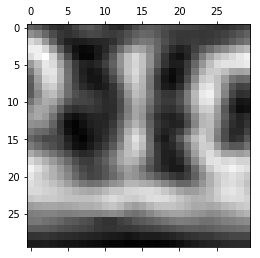

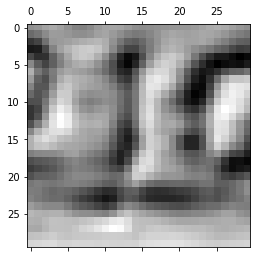

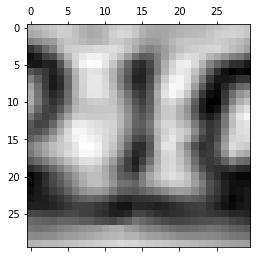

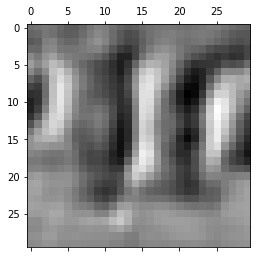

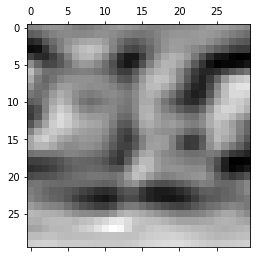

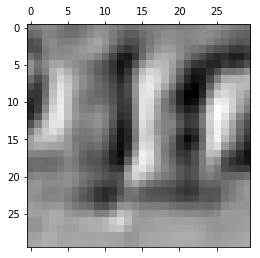

In [229]:
for i in range (6):
    plt.matshow(first_CNNlayer_activation[0, :, :, i], cmap='gray')

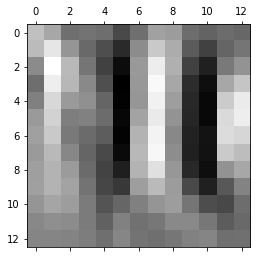

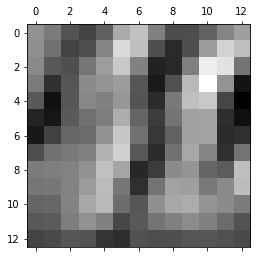

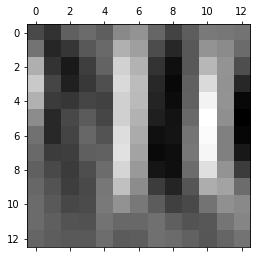

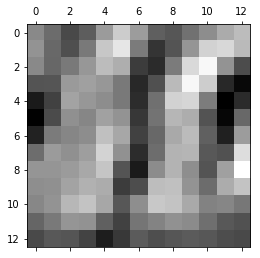

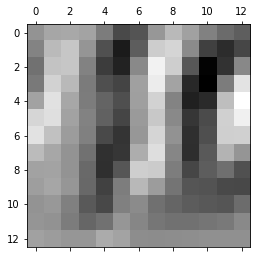

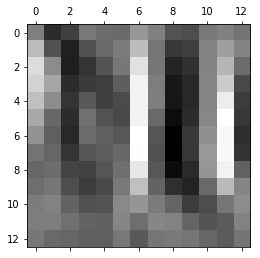

In [230]:
for i in range (6):
    plt.matshow(second_CNNlayer_activation[0, :, :, i], cmap='gray')

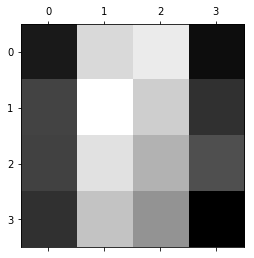

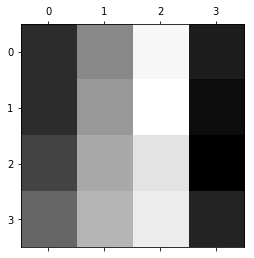

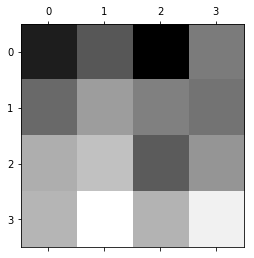

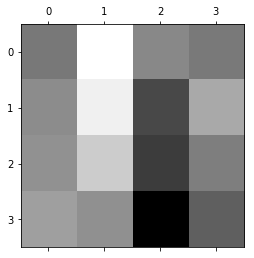

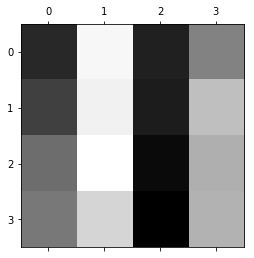

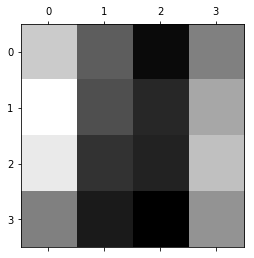

In [231]:
for i in range (6):
    plt.matshow(last_CNNlayer_activation[0, :, :, i], cmap='gray')

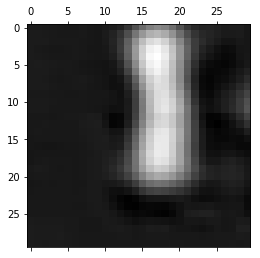

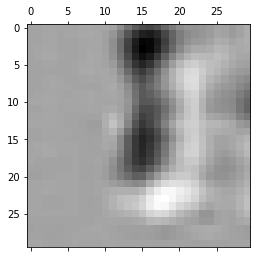

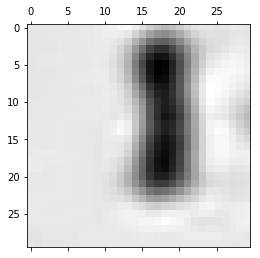

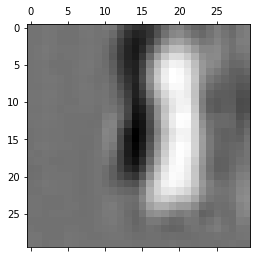

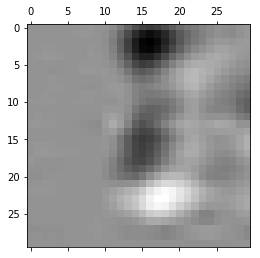

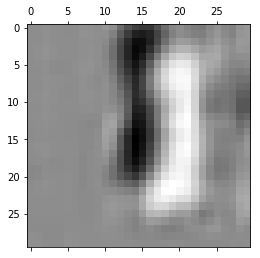

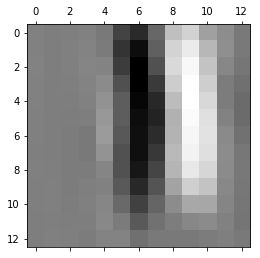

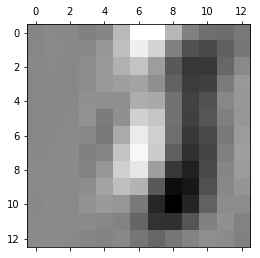

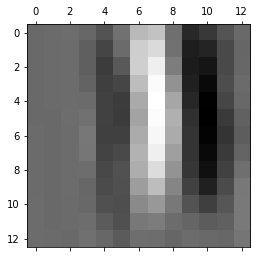

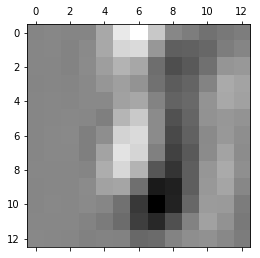

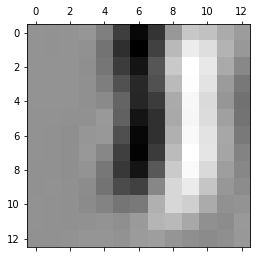

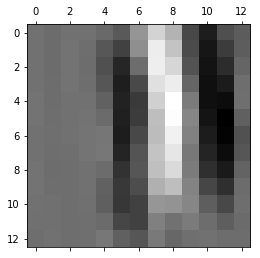

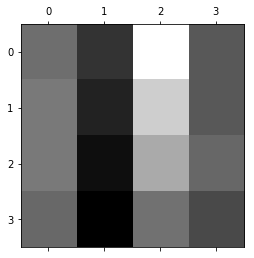

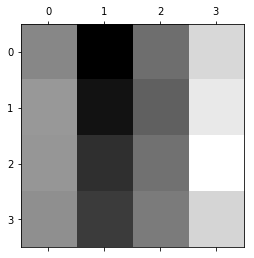

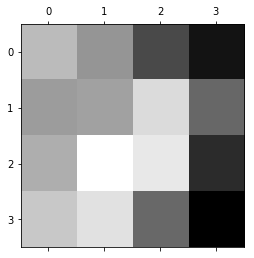

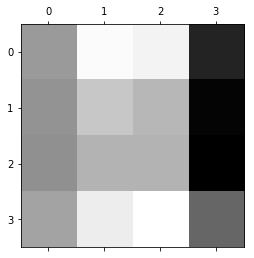

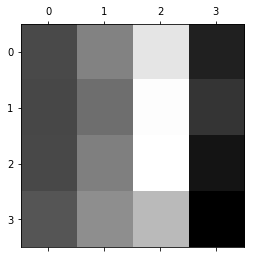

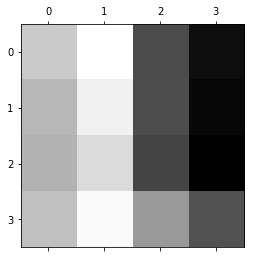

In [232]:
activations = activation_model.predict(test_images[4].reshape((1,32,32,1))) 
# Returns a list of Numpy arrays: one array per layer activation
first_CNNlayer_activation = activations[0]
second_CNNlayer_activation = activations[3]
last_CNNlayer_activation = activations[6]
for i in range (6):
    plt.matshow(first_CNNlayer_activation[0, :, :, i], cmap='gray')
for i in range (6):
    plt.matshow(second_CNNlayer_activation[0, :, :, i], cmap='gray')
for i in range (6):
    plt.matshow(last_CNNlayer_activation[0, :, :, i], cmap='gray')

# Conclusion: This model performed better than RF but 75% accuracy is not good enough. See next notebook for the final proposed CNN model.